# K-Nearest Neighbors (KNN)

O KNN é um dos algoritmos de aprendizado supervisionado mais simples. Ele é considerado um algoritmo "preguiçoso" (*lazy learner*), pois não constrói um modelo interno; em vez disso, ele armazena todos os dados de treinamento.

**Como funciona a classificação:**
1.  Quando um novo ponto de dado precisa ser classificado, o KNN calcula a distância entre esse ponto e todos os pontos no conjunto de treinamento.
2.  Ele seleciona os 'K' pontos de treinamento mais próximos (os vizinhos).
3.  A classe do novo ponto é definida pela classe majoritária entre esses 'K' vizinhos.

**Importante:** Como o KNN é baseado em distância, é **crucial** que os dados estejam na mesma escala. Portanto, a padronização (Standardization) ou normalização (Normalization) das features é um passo de pré-processamento essencial.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import make_classification

In [2]:
# Gerando dados sintéticos
X, y = make_classification(n_samples=300, n_features=2, n_redundant=0, n_informative=2,
                           random_state=42, n_clusters_per_class=1)

# Dividindo os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [3]:
# Criando um pipeline que primeiro padroniza os dados e depois aplica o KNN
# K=5 é um valor comum para começar
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])

# Treinando o modelo
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [4]:
# Fazendo predições
y_pred = pipeline.predict(X_test)

# Avaliando o modelo
print("Relatório de Classificação (K=5):")
print(classification_report(y_test, y_pred))
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

Relatório de Classificação (K=5):
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        45
           1       1.00      0.93      0.97        45

    accuracy                           0.97        90
   macro avg       0.97      0.97      0.97        90
weighted avg       0.97      0.97      0.97        90

Matriz de Confusão:
[[45  0]
 [ 3 42]]


In [5]:
# Função para visualizar a fronteira de decisão
def plot_decision_boundary(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k', cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.xlabel('Feature 1 (Padronizada)')
    plt.ylabel('Feature 2 (Padronizada)')
    plt.show()

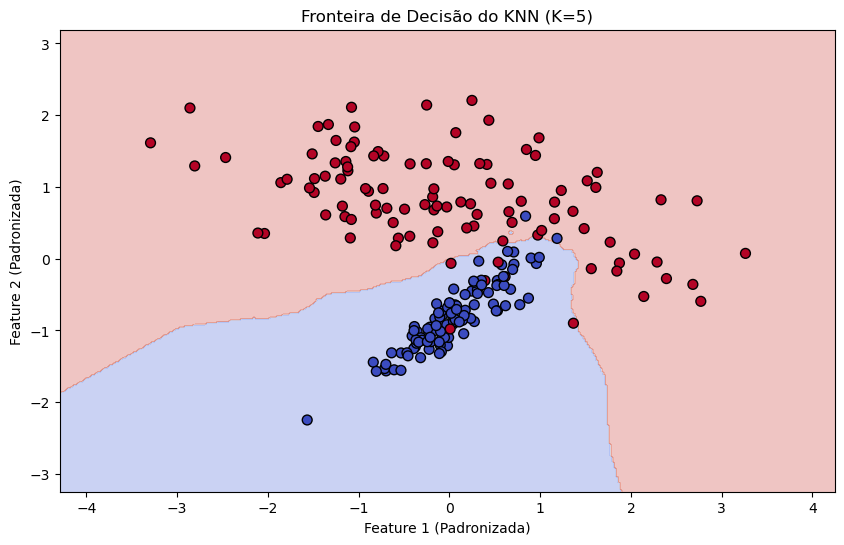

In [6]:
# Visualizando com os dados de treino padronizados
X_train_scaled = pipeline.named_steps['scaler'].transform(X_train)
plot_decision_boundary(X_train_scaled, y_train, pipeline.named_steps['knn'], 'Fronteira de Decisão do KNN (K=5)')